In [1]:
# Дана функция f(x) = f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
# 1. Определить корни
# 2. Найти интерваы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает 
# 4. Построить график
# 5. Вычислить вершину
# 6. Определить промежутки, на которых f>0
# 7. Определить промежутки, на которых f<0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
limit = 10
step = 0.01
color = 'b'
line_s = '-'
direct_up = True

In [4]:
a, b, c, d, e = -12, -18, 5, 10, -30

In [5]:
x = np.arange(-limit, limit, step)

In [6]:
# print(x)

In [7]:
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [8]:
def switch_line():
    global line_s
    if line_s == '-':
        line_s = '--'
    else:
        line_s = '-'
    return line_s

In [9]:
def func(x):
    return a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e

x_change = [(-limit, 'limit')]

for i in range(len(x) - 1):
    if (func(x[i]) > 0 and func(x[i+1]) < 0) or (func(x[i]) < 0 and func(x[i+1]) > 0):
        x_acuracy = np.arange(x[i], x[i+1], 0.00001)
        for j in range(len(x_acuracy) - 1):
            if (func(x_acuracy[j]) > 0 and func(x_acuracy[j+1]) < 0) or (func(x_acuracy[j]) < 0 and func(x_acuracy[j+1]) > 0):    
                x_change.append((x_acuracy[j] if abs(0 - x_acuracy[j]) < abs(0 - x_acuracy[j+1]) else x_acuracy[j+1], 'zero'))
    if direct_up:
        if (func(x[i]) > func(x[i+1])):
            x_acuracy = np.arange(x[i], x[i+1], 0.00001)
            for j in range(len(x_acuracy) - 1):
                if (func(x_acuracy[j]) > func(x_acuracy[j+1])):    
                    x_change.append((x_acuracy[j], 'direct'))
                    direct_up = False
    else:
        if (func(x[i]) < func(x[i+1])):
            x_acuracy = np.arange(x[i], x[i+1], 0.00001)
            for j in range(len(x_acuracy) - 1):
                if (func(x_acuracy[j]) < func(x_acuracy[j+1])):    
                    x_change.append((x_acuracy[j], 'direct'))
                    direct_up = True
            
            
            
            
x_change.append((limit, 'limit'))      
# print(x_change)

C:\Users\Олег\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Олег\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


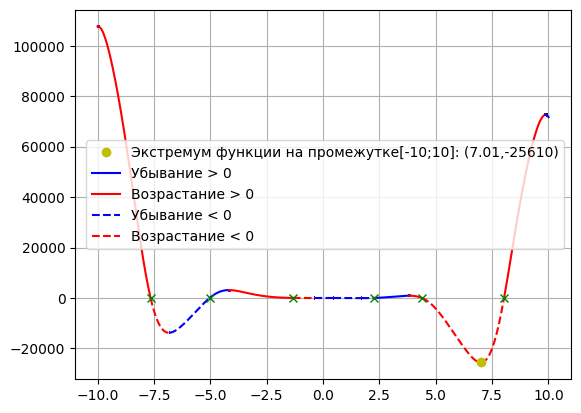

In [10]:
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i+1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())
        
min_y = min(func(x))
min_x = -limit
for x in x_change:
    if x[1] in ['direct','limit']:
        if (func(x[0]) - min_y) < abs(min_x - min_y):
            min_x = x[0]
        
roots = []
for x in x_change:
    if x[1] == 'zero':
        roots.append(str(round(x[0], 2)))
        plt.plot(x[0], func(x[0]), 'gx')

plt.plot(min_x, min_y, 'yo', label=f'Экстремум функции на промежутке[{-limit};{limit}]: ({round(min_x, 2)},{round(min_y)})')
        
plt.grid()
plt.rcParams['lines.linestyle'] = '-'
plt.plot(0, 0, 'b', label='Убывание > 0')
plt.plot(0, 0, 'r', label='Возрастание > 0')
plt.rcParams['lines.linestyle'] = '--'
plt.plot(0, 0, 'b', label='Убывание < 0')
plt.plot(0, 0, 'r', label='Возрастание < 0')
# plt.title(f'Корни на промежутке [{-limit};{limit}]: {", ".join(roots)}')
plt.rcParams['lines.linestyle'] = switch_line()
plt.legend()